## Titanic Survival Project
The content of this project will consist of training and testing various machine learning models utilizing the Titanic dataset provided by Kaggle. The goal is to try and successfully predict if a passenger survived based off of numerous features, such as sex, ticket class, fare, age, etc.

In [2]:
!pip install kaggle

In [6]:
!kaggle competitions download -c titanic


  0%|          | 0.00/34.1k [00:00<?, ?B/s]
100%|##########| 34.1k/34.1k [00:00<00:00, 9.96MB/s]


In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
df = pd.read_csv('train.csv')

In [136]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [138]:
#Calculating the proportion of men and women that survived respectively, 
#as well as the proportion of women out of the total that survived.

df_male = df[df['Sex'] == 'male']
df_female = df[df['Sex'] == 'female']

prop_male_survived = df_male['Survived'].mean()
prop_female_survived = df_female['Survived'].mean()

print('Proportion of men survived out of all men:', prop_male_survived, 
    '\nProportion of women survived out of all women',prop_female_survived)

total_females_survived_proportion = sum(df_female['Survived'])/sum(df['Survived'])
print('Proportion of women survived out of all survivors:', total_females_survived_proportion)


Proportion of men survived out of all men: 0.18890814558058924 
Proportion of women survived out of all women 0.7420382165605095
Proportion of women survived out of all survivors: 0.6812865497076024


In [164]:
#One hot encode sex column
df_enc = pd.get_dummies(df,columns=['Sex'])
df_enc.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


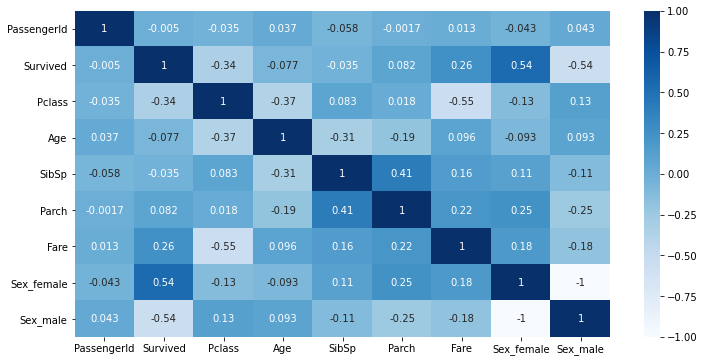

In [181]:
#Show pearson correlation for dataset features

plt.figure(figsize=(12,6))
sns.heatmap(df_enc.corr(), annot=True, cmap = 'Blues')
plt.show()

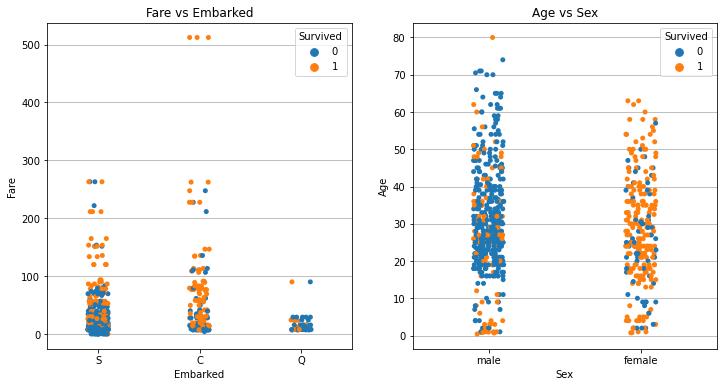

In [206]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

fig1 = sns.stripplot(y='Fare', x='Embarked', hue='Survived', data = df, ax=axes[0])
fig2 = sns.stripplot(y='Age', x = 'Sex', hue='Survived', data=df, ax=axes[1])
fig1.set_title('Fare vs Embarked')
fig2.set_title('Age vs Sex')
fig1.grid(True, axis='y')
fig2.grid(True, axis='y')


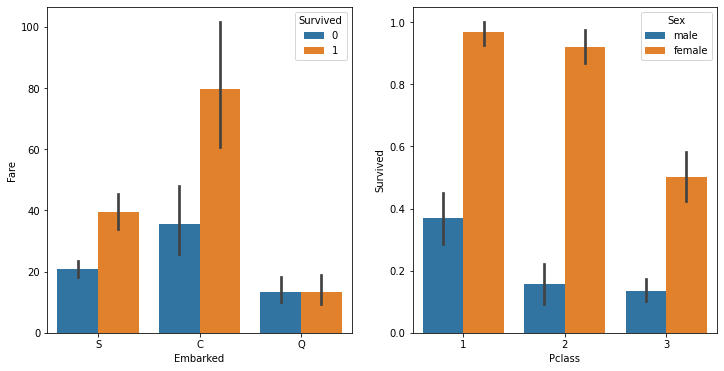

In [195]:
fig, axes = plt.subplots(1,2, figsize=(12,6))

sns.barplot(y='Fare', x ='Embarked', hue='Survived', data = df, ax=axes[0])
sns.barplot(x='Pclass', y = 'Survived', hue='Sex', data=df, ax=axes[1])

In [207]:
#TODO: explore the relationship between passengers having children vs ones that do not, and visualize their survival

In [208]:
pwd

'C:\\Users\\jense\\Kaggle Stuff'